# Overview - UFC
### Here I will be adding some info

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = Path('ufc-master.csv')

In [3]:
df = pd.read_csv(file_path)

In [22]:
df

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


info about data as you can see i have 6528 rows and 118 columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB


In [97]:
df.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,...,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,...,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,...,4.307369,4.352773,1.007887,360.383418,250.750088,325.940028,601.826547,671.106177,426.563458,465.014634
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,439.750000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.280000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,875.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


In [28]:
df.columns

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)

# Data cleaning and showing missing data 

In [30]:
missing_values = df.isnull().sum()
missing_values

RedFighter             0
BlueFighter            0
RedOdds              227
BlueOdds             226
RedExpectedValue     227
                    ... 
BlueDecOdds         1116
RSubOdds            1336
BSubOdds            1359
RKOOdds             1334
BKOOdds             1360
Length: 118, dtype: int64

In [40]:
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)

Columns with missing values:
RedOdds                   227
BlueOdds                  226
RedExpectedValue          227
BlueExpectedValue         226
BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
EmptyArena               1486
BMatchWCRank             5328
RMatchWCRank             4749
RWFlyweightRank          6432
RWFeatherweightRank      6519
RWStrawweightRank        6382
RWBantamweightRank       6374
RHeavyweightRank         6342
RLightHeavyweightRank    6344
RMiddleweightRank        6346
RWelterweightRank        6337
RLightweightRank         6344
RFeatherweightRank       6351
RBantamweightRank        6347
RFlyweightRank           6340
RPFPRank                 6275
BWFlyweightRank          6455
BWFeatherwe

In [44]:
missing_data = df.isnull()

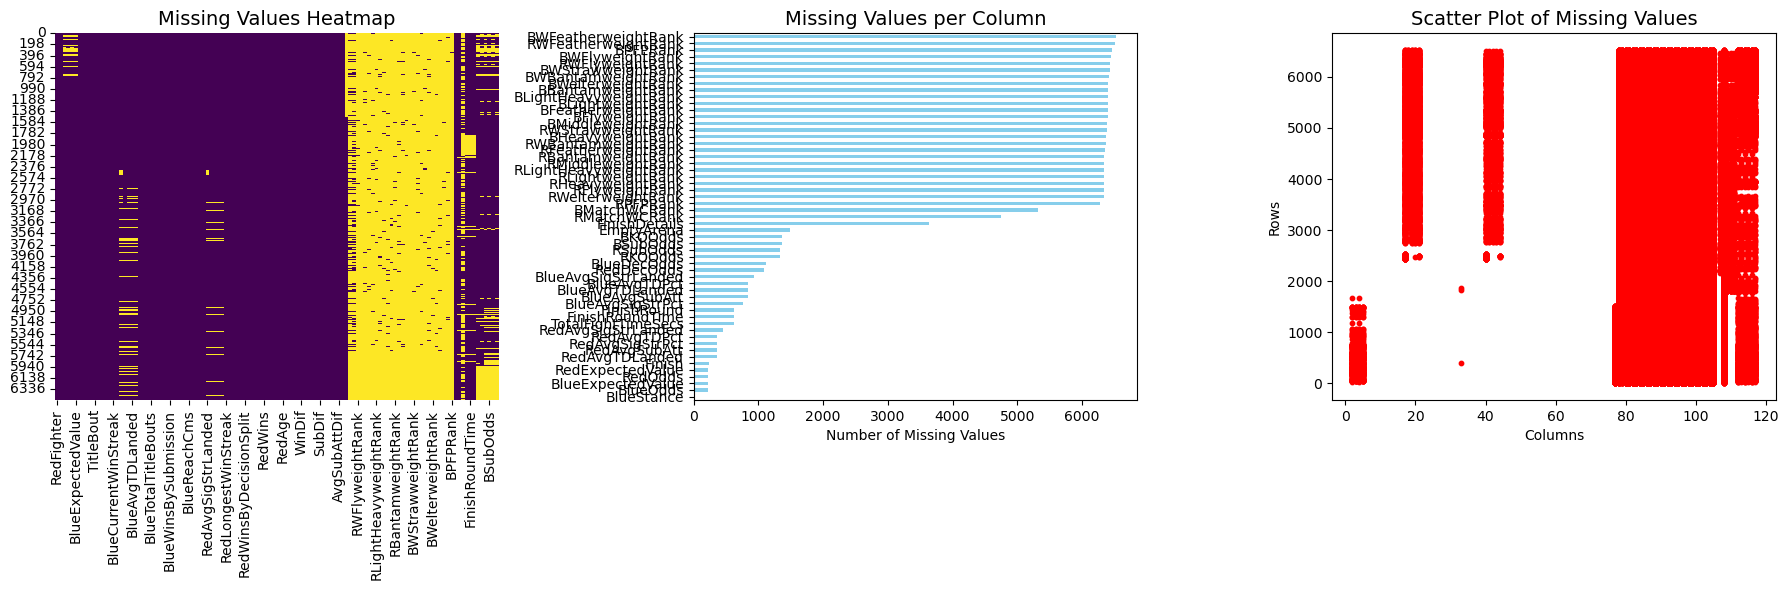

In [94]:
# Create the subplots for the heatmap, bar chart, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# 1. Heatmap of missing values
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

# 2. Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values

# Check if there are any missing values before plotting the bar chart
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

# 3. Scatter plot of missing values (showing rows and columns with missing data)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

# Show the plot
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()

# Handling data missing values

In [7]:
# Iterate through each column to fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Only process columns with missing values
        if df[column].dtype == 'object' or df[column].dtype == 'category':  # Categorical column
            # Fill missing values with the most frequent value (mode)
            most_frequent_value = df[column].mode()[0]
            df[column].fillna(most_frequent_value, inplace=True)
        else:  # Numerical column
            mean_value = df[column].mean()  # Default: mean
            median_value = df[column].median()  # Alternative: median
            df[column].fillna(mean_value, inplace=True)  # Switch to median_value if you want median

# Check if there are any missing values left
missing_after_fill = df.isnull().sum()
print("Missing values after filling with mean/median/mode:")
print(missing_after_fill)

Missing values after filling with mean/median/mode:
RedFighter          0
BlueFighter         0
RedOdds             0
BlueOdds            0
RedExpectedValue    0
                   ..
BlueDecOdds         0
RSubOdds            0
BSubOdds            0
RKOOdds             0
BKOOdds             0
Length: 118, dtype: int64


C:\Users\khami\AppData\Local\Temp\ipykernel_22928\959101527.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Switch to median_value if you want median
C:\Users\khami\AppData\Local\Temp\ipykernel_22928\959101527.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

### Results after handling our missing values

In [74]:
missing_values = df.isnull().sum()
missing_values

RedFighter          0
BlueFighter         0
RedOdds             0
BlueOdds            0
RedExpectedValue    0
                   ..
BlueDecOdds         0
RSubOdds            0
BSubOdds            0
RKOOdds             0
BKOOdds             0
Length: 118, dtype: int64

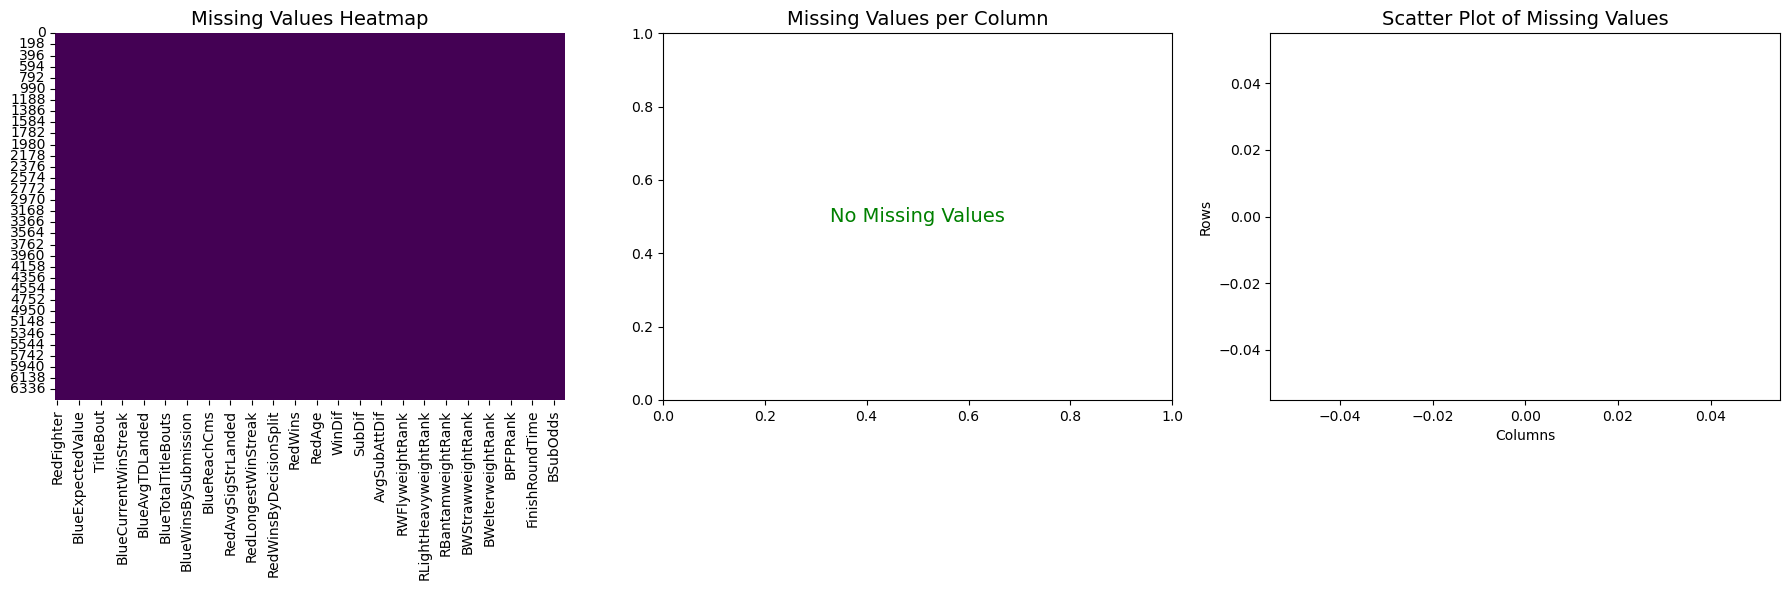

In [9]:
# Create the subplots for the heatmap, bar chart, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# 1. Heatmap of missing values
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

# 2. Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values

# Check if there are any missing values before plotting the bar chart
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

# 3. Scatter plot of missing values (showing rows and columns with missing data)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

# Show the plot
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()


### Notes:
we checked for missing values 

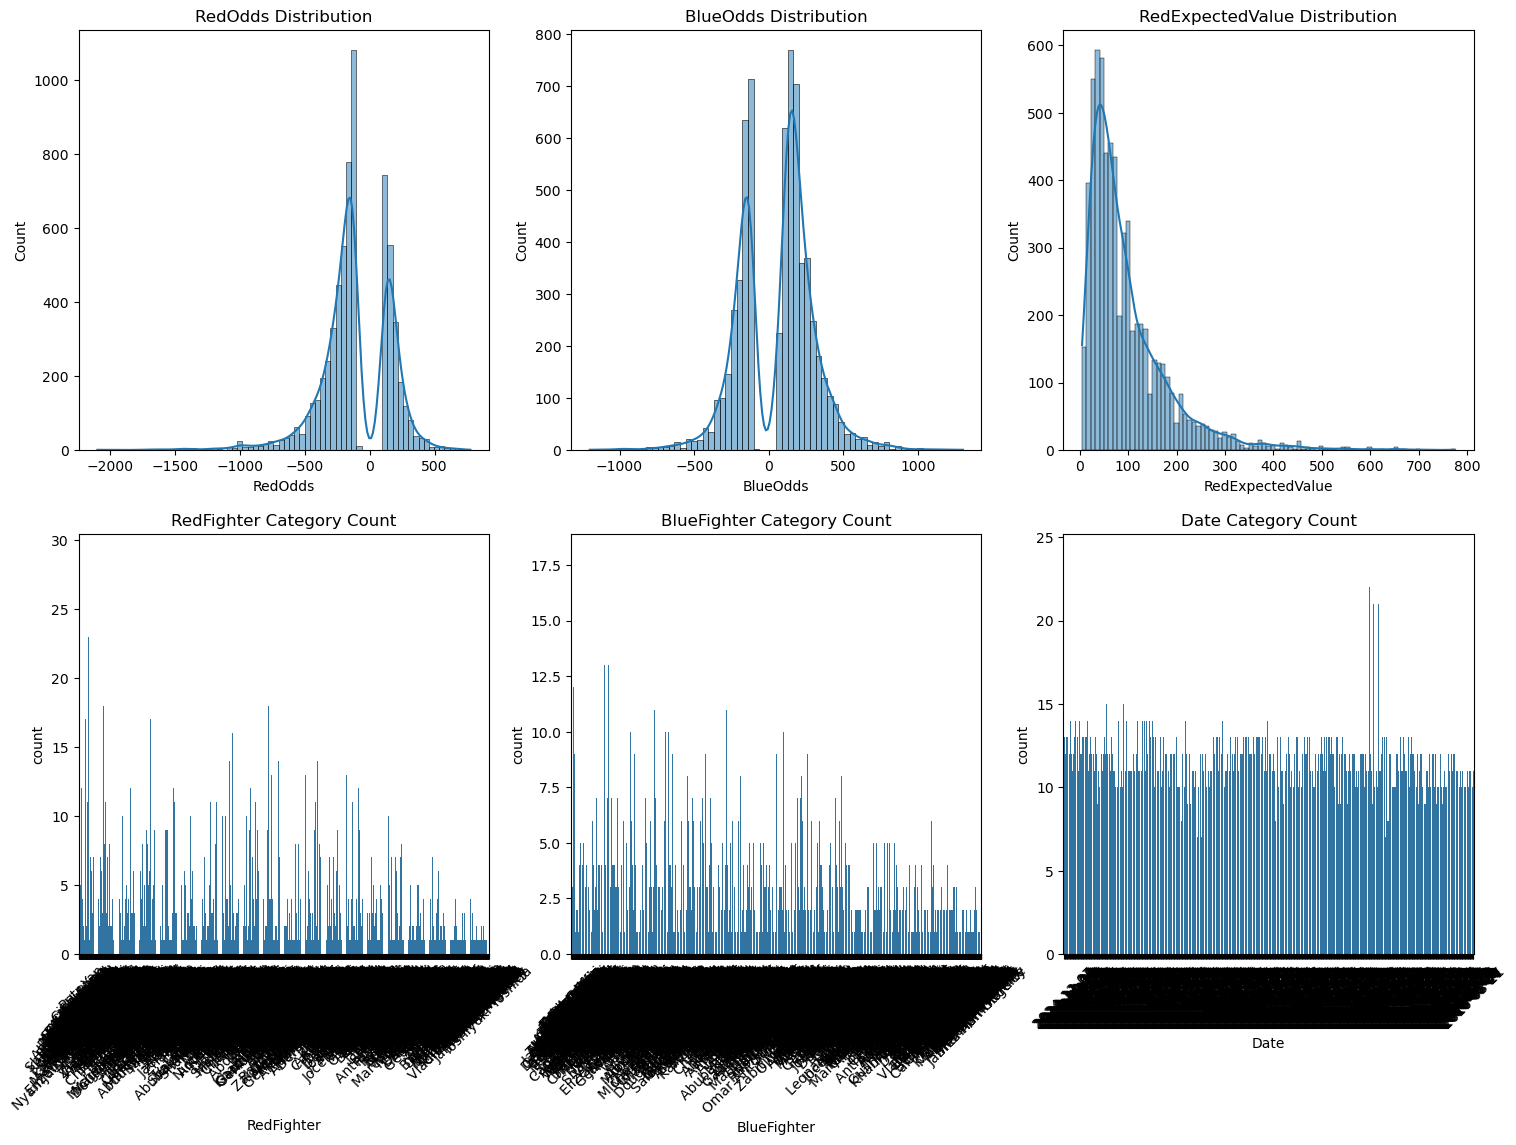

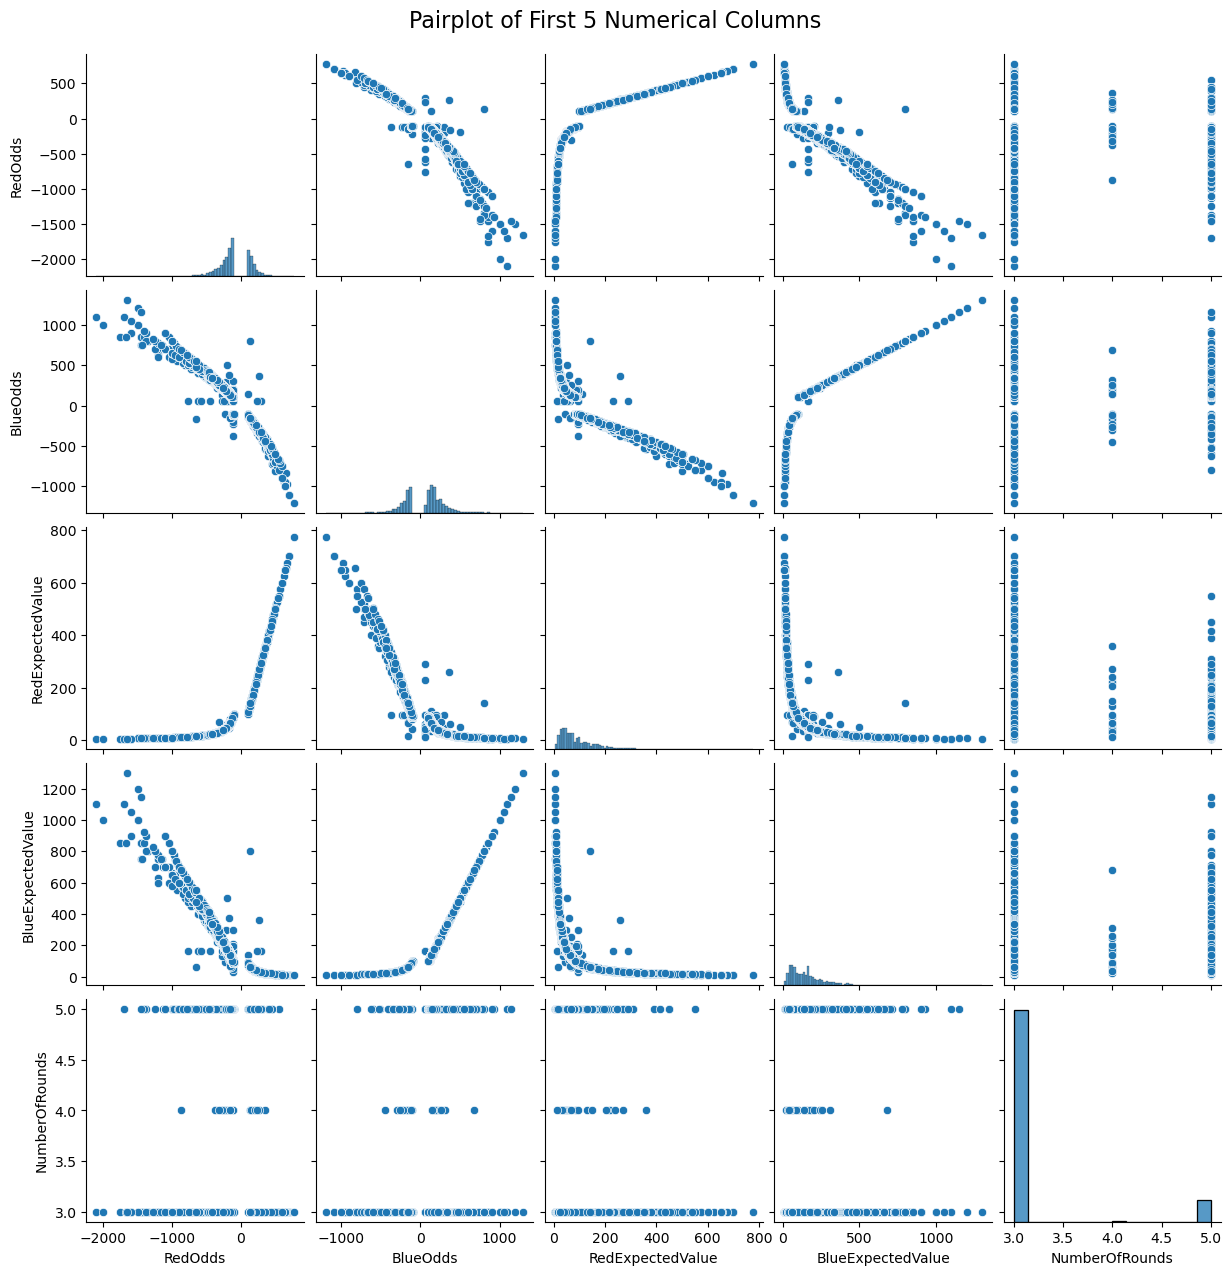

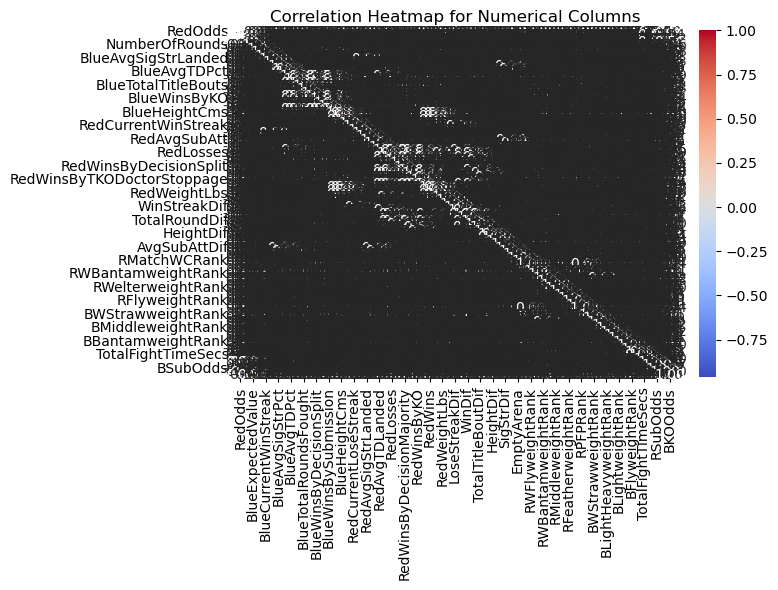

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# 1. Histogram of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numerical_columns[:3]):  # Show up to 3 histograms
    sns.histplot(df[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{col} Distribution')

# 2. Barplot of categorical columns (showing frequency of categories)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for i, col in enumerate(categorical_columns[:3]):  # Show up to 3 bar plots
    sns.countplot(x=df[col], ax=axes[1, i])
    axes[1, i].set_title(f'{col} Category Count')
    axes[1, i].tick_params(axis='x', rotation=45)

# 3. Pairplot (scatterplot matrix) of first few numerical columns
sns.pairplot(df[numerical_columns[:5]])  # Show pairplot of the first 5 numerical columns
plt.suptitle('Pairplot of First 5 Numerical Columns', y=1.02, fontsize=16)

# 4. Correlation heatmap for numerical columns
corr = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')

# Show the plots
plt.tight_layout()

# Principal Component Analysis (PCA) and Clustering

## What is PCA and Why is it Used?
Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify datasets with a large number of features while retaining the most important information. It works by identifying patterns in the data and transforming it into a set of new, uncorrelated variables called **principal components**. These components capture the majority of the variance in the original dataset.

**Why Use PCA?**
- To reduce the number of dimensions while preserving critical information.
- To eliminate multicollinearity between features.
- To improve the performance of clustering algorithms by simplifying the data.
- To visualize high-dimensional data in 2D or 3D space.

---

## What is Clustering?
Clustering is an unsupervised machine learning technique used to group data points into clusters based on their similarity. Each cluster represents a group of data points that share common characteristics.

### K-Means Clustering
K-Means is one of the most popular clustering algorithms. It works by:
1. Randomly initializing cluster centroids.
2. Assigning each data point to the nearest centroid.
3. Recomputing centroids based on the mean of points in each cluster.
4. Iterating until centroids stabilize or a stopping condition is met.

**Pros**:
- Simple and easy to implement.
- Works well for large datasets.

**Cons**:
- Sensitive to outliers and initial centroid selection.
- Requires the number of clusters (K) to be predefined.

### Partitioning Around Medoids (PAM)
PAM is a clustering algorithm similar to K-Means but uses actual data points (medoids) as cluster centers instead of centroids. This makes it more robust to outliers.

**Why Use PAM?**
- It is less sensitive to outliers compared to K-Means.
- Suitable for datasets with categorical features or when distances between data points are important.

---

## Why I am Using PCA and Clustering?
1. **Dimensionality Reduction**: My dataset contains 118 columns, many of which are redundant or less relevant. PCA will reduce the dimensions while retaining key information.
2. **Clustering Analysis**: K-Means or PAM will help group fighters based on their performance, physical attributes, and other key metrics to identify patterns in the data.

---

## Columns to Reduce or Exclude
### Why Reduce Columns?
Having too many columns can lead to:
- **Curse of Dimensionality**: High-dimensional data can make clustering algorithms less effective.
- **Redundancy**: Some columns are highly correlated or irrelevant to clustering goals.

### Columns to Exclude:
- **RedFighter, BlueFighter, Date, Location, Country**: These are identifiers and not useful for clustering.
- **Finish, FinishDetails, FinishRound, FinishRoundTime**: These are specific to the fight outcomes and not directly useful for clustering.
- **Odds (e.g., RedOdds, BlueOdds)**: These represent betting data and may introduce bias.
- **Detailed Win/Loss Columns (e.g., BlueWinsByKO, RedWinsByDecisionMajority)**: These are highly detailed and redundant with aggregate win/loss metrics.

---

## Columns to Keep
### Why Keep These Columns?
The retained columns are directly related to fighter performance, physical attributes, and comparative metrics, which are relevant for clustering.

- **Performance Metrics**:
  - `RedAvgSigStrLanded`, `BlueAvgSigStrLanded`: Average significant strikes landed per fight.
  - `RedAvgTDPct`, `BlueAvgTDPct`: Takedown success percentage.
  - `SigStrDif`, `AvgTDDif`: Differences between fighters in performance metrics.

- **Win/Loss Information**:
  - `WinDif`, `LossDif`, `LongestWinStreakDif`: Differences in win/loss streaks and overall records.

- **Physical Attributes**:
  - `HeightDif`, `ReachDif`, `AgeDif`: Differences in physical attributes that often impact fight outcomes.

These features capture the essence of fighter abilities and are well-suited for clustering analysis.

---

By applying PCA, I will ensure that the retained features are transformed into a compact and meaningful representation of the dataset, making the clustering process more effective and interpretable.


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
columns_to_keep = [
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded', 'RedAvgTDPct', 'BlueAvgTDPct',
    'SigStrDif', 'AvgTDDif', 'WinDif', 'LossDif', 'LongestWinStreakDif',
    'HeightDif', 'ReachDif', 'AgeDif'
]

# Filter the dataset to keep only the relevant columns
df_clustering = df[columns_to_keep]

# Handle any missing values by imputing with the mean (optional, if needed)
df_clustering.fillna(df_clustering.mean(), inplace=True)

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
df_pca = pca.fit_transform(df_scaled)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Create a new DataFrame for the reduced data
df_pca_reduced = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Print some info about the PCA results
print("Original number of features:", df_clustering.shape[1])
print("Number of principal components:", df_pca_reduced.shape[1])
print("Explained variance ratio by each component:", explained_variance)

# Save or use the reduced DataFrame for clustering
# df_pca_reduced.to_csv('reduced_dataset.csv', index=False)

Original number of features: 12
Number of principal components: 10
Explained variance ratio by each component: [0.15578716 0.14696695 0.13458467 0.11495238 0.10865286 0.10640416
 0.08533575 0.04694396 0.04018837 0.03076292]


C:\Users\khami\AppData\Local\Temp\ipykernel_22928\1622637480.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering.fillna(df_clustering.mean(), inplace=True)


In [20]:
df.columns

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)

# Principal Component Analysis (PCA) and Dimensionality Reduction

## What Happened in the Code?

### 1. Column Selection:
- We carefully selected columns most relevant to clustering, such as:
  - `SigStrDif` (Significant Strikes Difference)
  - `WinDif` (Win Difference)
  - `HeightDif` (Height Difference)
  - `ReachDif` (Reach Difference)
  - And other similar features.
- Irrelevant or categorical columns (e.g., `RedFighter`, `BlueFighter`, `Location`) were excluded because they do not contribute meaningfully to numerical clustering algorithms.

### 2. Handling Missing Values:
- Missing values were filled with the **mean** of their respective columns to ensure all data points were usable without introducing significant bias.

### 3. Standardization:
- The data was standardized using `StandardScaler` to normalize all features. This step ensures that:
  - Features with larger scales (e.g., `HeightDif` in centimeters) do not dominate features with smaller scales (e.g., `WinDif`).

### 4. PCA Transformation:
- PCA was applied to reduce dimensionality while retaining **95% of the dataset's variance**.
- The transformation condensed the original dataset into a smaller set of uncorrelated components, focusing only on the most significant patterns and relationships in the data.

### 5. Reduction Results:
- The high-dimensional dataset (with many features) was reduced to a smaller number of **principal components**, maintaining most of the dataset’s variability.
- This makes subsequent clustering more efficient and effective.

---

## Why Did This Happen?

### **The Need for Dimensionality Reduction**:
- High-dimensional data often suffers from the "curse of dimensionality," where clustering algorithms struggle to find meaningful patterns.
- PCA simplifies the dataset by eliminating redundant or less informative features, focusing on the core structure of the data.

### **Preservation of Variance**:
- By retaining 95% of the variance, PCA ensures that the reduced dataset still contains most of the important information from the original data.

### **Preparation for Clustering**:
- Clustering algorithms like K-Means or PAM rely on distances between data points. PCA makes the dataset more compact and ensures the algorithms can process the data efficiently while avoiding overfitting.

---

## Summary of Actions:
1. Excluded irrelevant or categorical columns to focus on key attributes for clustering.
2. Handled missing values by filling them with the mean to prevent data loss.
3. Standardized the dataset to balance feature contributions.
4. Applied PCA to reduce dimensions, ensuring the dataset is computationally efficient and effective for clustering.

This process optimizes the dataset, making it ready for the next stage of analysis: **clustering**.


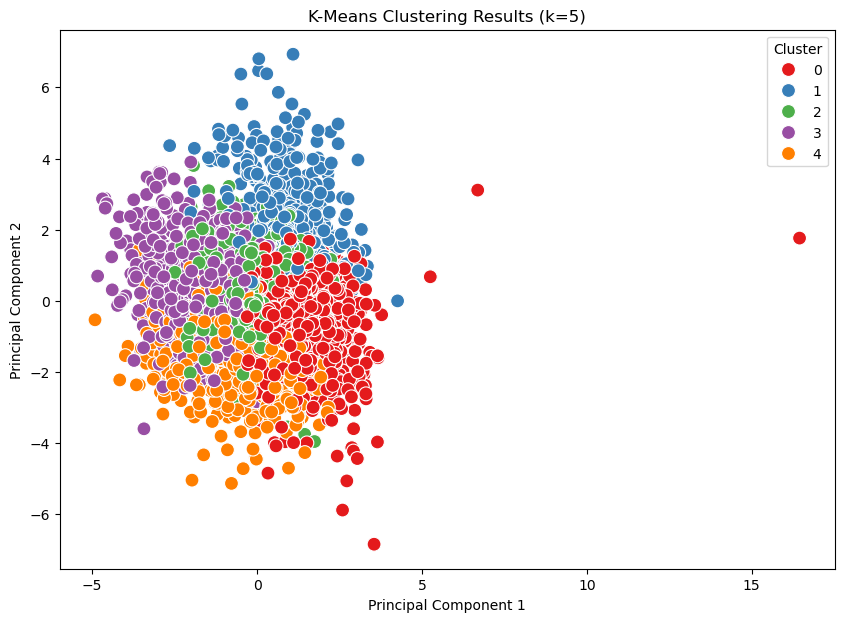

C:\Users\khami\AppData\Local\Temp\ipykernel_22928\1953841336.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pca_reduced, x='Cluster', palette='Set1')


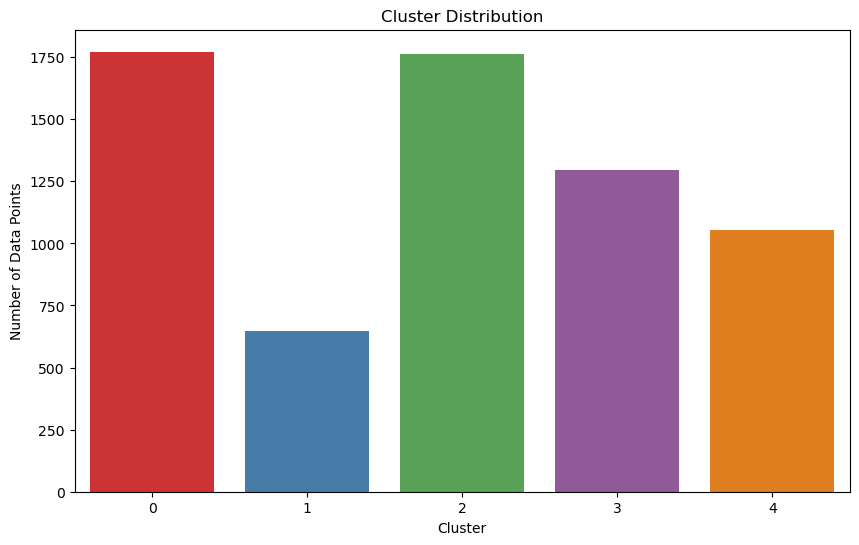

In [39]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_pca_reduced)

# Add cluster labels to the PCA DataFrame for visualization
df_pca_reduced['Cluster'] = clusters

# Scatter plot for the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_pca_reduced['PC1'],
    y=df_pca_reduced['PC2'],
    hue=df_pca_reduced['Cluster'],
    palette='Set1',
    s=100
)
plt.title('K-Means Clustering Results (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Bar chart to show the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pca_reduced, x='Cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

C:\Users\khami\AppData\Local\Temp\ipykernel_22928\55099519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PC1', data=df_pca_reduced, palette='Set1')


Text(0, 0.5, 'Principal Component 1')

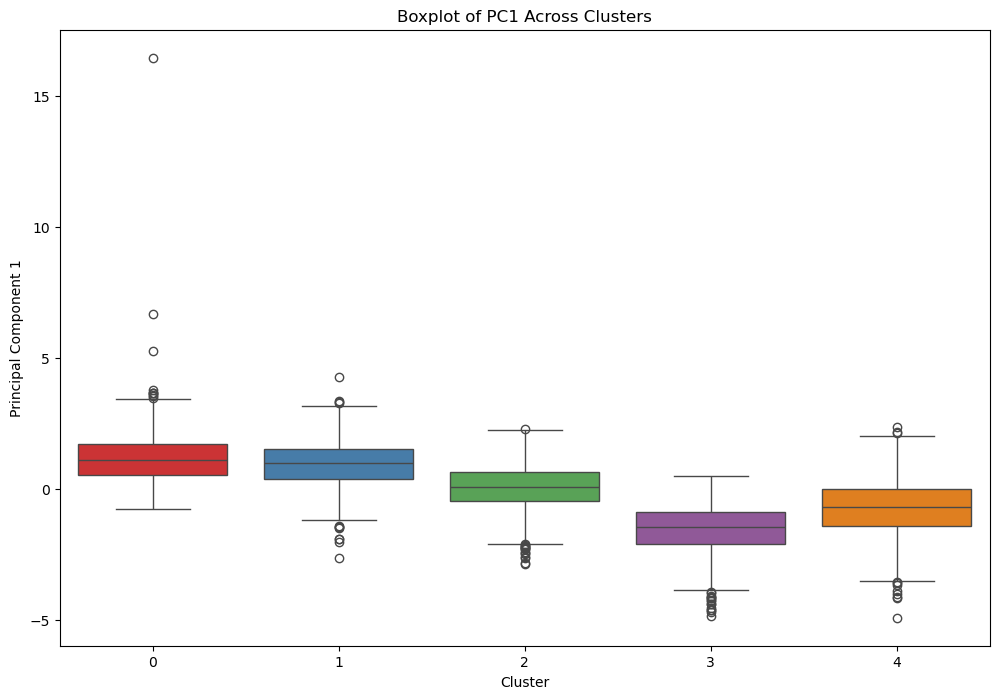

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='PC1', data=df_pca_reduced, palette='Set1')
plt.title('Boxplot of PC1 Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Principal Component 1')

C:\Users\khami\AppData\Local\Temp\ipykernel_22928\85302251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PC2', data=df_pca_reduced, palette='Set1')


Text(0, 0.5, 'Principal Component 2')

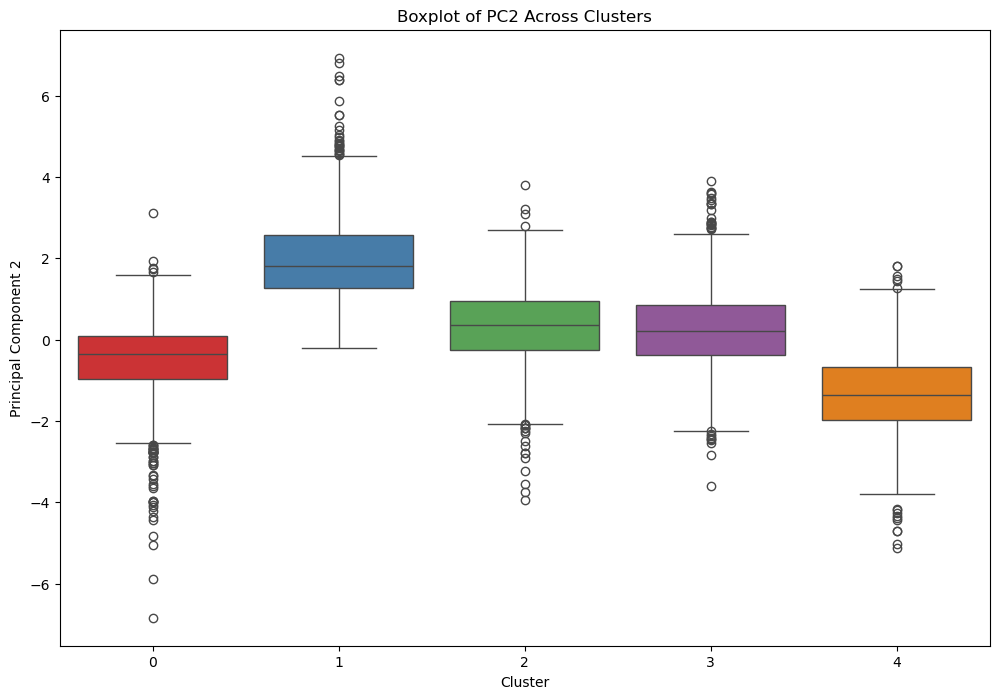

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='PC2', data=df_pca_reduced, palette='Set1')
plt.title('Boxplot of PC2 Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Principal Component 2')

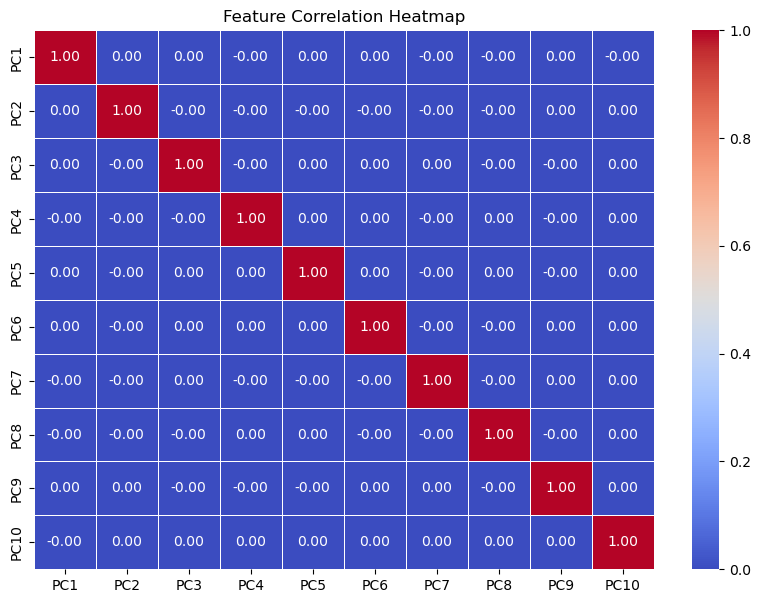

In [73]:
# 2. Heatmap for Feature Correlation within Clusters
# Calculate the correlation matrix for the features
corr_matrix = df_pca_reduced.drop(columns=['Cluster']).corr()
# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\khami\AppData\Local\Temp\ipykernel_22928\1494295066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pca_reduced, x='Cluster', palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

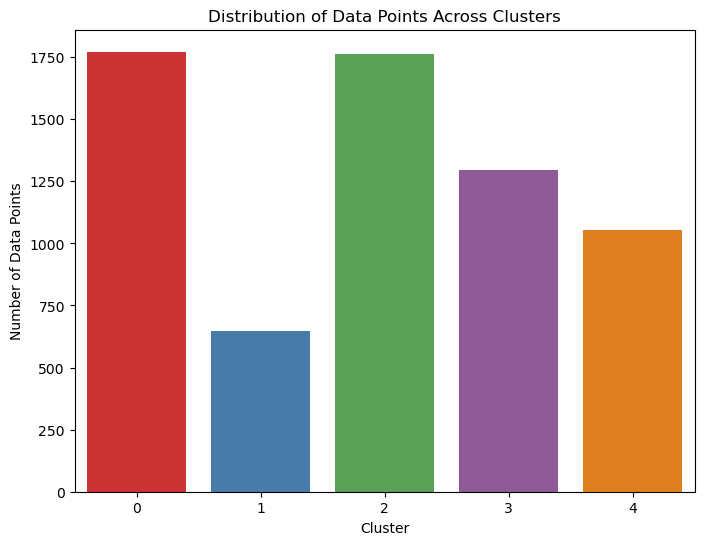

In [71]:
# 3. Bar Chart for Cluster Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_pca_reduced, x='Cluster', palette='Set1')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show